# IT41 Project

## Introduction

In this project, our goal is to learn about different sorting algorithms and how they work. Sorting algorithms are very important in computer science because they help us organize data in many ways, like in databases or search engines. By looking at different algorithms, we can learn about their strengths and weaknesses. This helps us choose the best algorithm for a specific task.

For this project, we choose to study 6 different sorting algorithms : 
- Bogosort
- Bubble sort
- Insertion sort
- Selection sort
- Merge sort
- Quick sort

For each algorithm, we will explain what it is used for and how it works. Then, we will study its complexity. After that, we will write code for the algorithm and see how it performs with tests.
By the end of this project, we hope to understand these sorting algorithms better and how they can be used in real-life situations.

Here there are some useful functions that we will use later in the project to test the algorithms.

In [52]:
import time, random, matplotlib.pyplot as plt

NUMBER_TEST = 30
MAX_SIZE_TEST = 5000
x_size = []
test_arr = [[] for _ in range(MAX_SIZE_TEST)]

algo_dict = {
    'bubble_sort': {'title': 'Bubble sort', 'color': 'g', 'y_time': []},
    'insertion_sort': {'title': 'Insertion sort', 'color': 'y', 'y_time': []},
    'selection_sort': {'title': 'Selection sort', 'color': 'c', 'y_time': []},
    'merge_sort': {'title': 'Merge sort', 'color': 'm', 'y_time': []},
    'quick_sort': {'title': 'Quick sort', 'color': 'r', 'y_time': []},
}


def generate_test_data():
    global x_size, test_arr
    _j = 0
    for _i in range(NUMBER_TEST):
        test_arr[_i] = random.sample(range(-10000, 90000), _j)
        x_size.append(_j)
        _j += MAX_SIZE_TEST // NUMBER_TEST


def testing_algorithm(algo, arr):
    start = time.time()
    algo(arr)
    end = time.time()
    return end - start


def plot_time(algo):
    global algo_dict, test_arr
    algo_info = algo_dict.get(algo.__name__, {'title': 'Unknown algorithm', 'color': 'k', 'y_time': []})
    y_time = []
    for i in range(NUMBER_TEST):
        y_time.append(testing_algorithm(algo, test_arr[i]))
    algo_info['y_time'] = y_time
    algo_dict[algo.__name__] = algo_info
    plt.title(algo_info['title'] + ' execution')
    plt.xlabel('Size of the array')
    plt.ylabel('Time of execution (seconds)')
    plt.plot(x_size, y_time, algo_info['color'], label=algo.__name__)
    plt.show()


generate_test_data()

## Bogosort:

Bogosort is a sorting algorithm mainly used for educational purposes. The prince is that you randomly shuffle the list until it is sorted.

The basic idea of bogosort is to:

    Check if the array is sorted
    If not, shuffle it randomly
    Otherwise returne the array

The advantage of bogosort is that it can be useful for teaching the basics of sorting algorithms, clearly showing the differences in performance between different algorithms.

The disadvantage of bogosort is that, because of its unpredictable nature, it is extremely inefficient. Bogosort is often considered as a joke in the computing community.

### Complexity:

<img src="img/bogo.png" width="600"/>

### Implementation:

In [53]:
# We check if the array is sorted
def is_sorted(arr):
    for i in range(len(arr) - 1):
        if arr[i] > arr[i + 1]:
            return False
    return True


def bogosort(arr):
    while not is_sorted(arr):
        random.shuffle(arr)  # We shuffle the array until it is sorted
    return arr

## Bubble sort:

Bubble sort is a simple sorting algorithm that works by repeatedly swapping adjacent elements that are in the wrong order. The algorithm gets its name from the way that smaller elements "bubble" to the top of the list during each pass through the list.

The basic idea of bubble sort is to:

    Start at the beginning of the list and compare each pair of adjacent elements.
    If the elements are in the wrong order, swap them.
    Repeat this process for each pair of adjacent elements in the list.
    Continue making passes through the list until no more swaps are necessary.

The advantages of bubble sort are its simplicity and ease of implementation. It also requires little memory and is stable, meaning that the order of equal elements is not changed by the algorithm.

The disadvantages of bubble sort are that it is slow for large lists and is generally less efficient than other sorting algorithms. It also does not adapt well to partially sorted lists, as it still requires the same number of passes through the list to complete.

### Complexity:

<img src="img/bubble.png" width="600"/>

### Implementation:

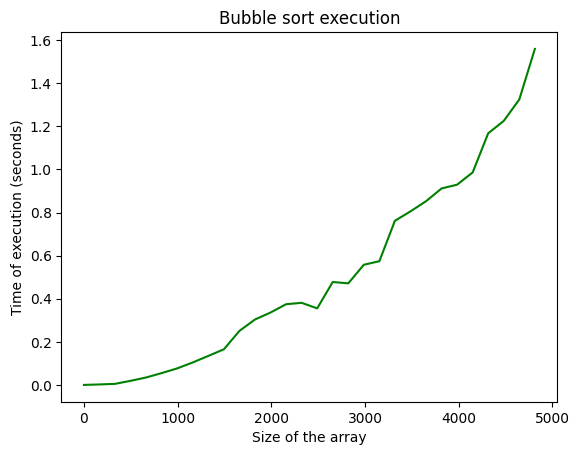

In [54]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr


plot_time(bubble_sort)

## Insertion sort:

Insertion sort is a simple and efficient sorting algorithm that can be used to sort small to medium-sized lists. The algorithm gets its name from the fact that it sorts the list by inserting each element into its correct place in a sorted list.

The basic idea of insertion sort is to:

    Start with the second element of the list and compare it to its predecessor.
    If the predecessor is larger, swap the two elements.
    Continue making comparisons and swapping elements until you reach the beginning of the list or find an element smaller than the one you are comparing.
    Repeat these steps for each element in the list.

The advantages of insertion sort are its simplicity and efficiency for small to medium-sized lists. It uses little memory and can be implemented easily. It is also stable, which means that the order of equal elements is not changed.

The disadvantages of insertion sort are that it can be slow for large lists or for lists with a random distribution of values. Additionally, it cannot be efficiently parallelized, which means it cannot be sped up by using multiple processors or computing cores.


### Complexity:

<img src="img/insertion.png" width="600"/>

### Implementation:

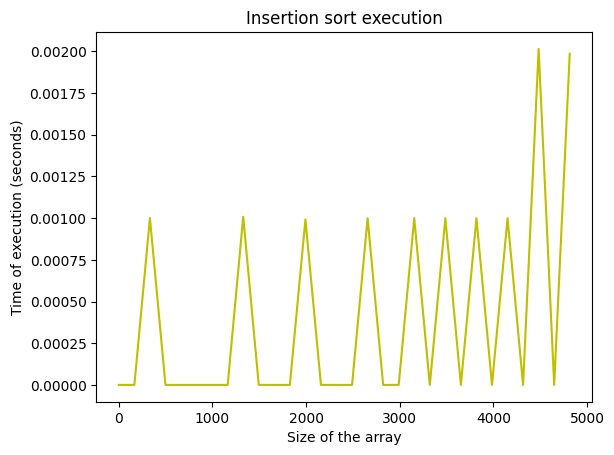

In [55]:
def insertion_sort(arr):
    n = len(arr)
    for i in range(1, n):
        current = arr[i]
        j = i - 1
        while j >= 0 and current < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = current
    return arr


plot_time(insertion_sort)

## Selection sort:

Selection sort is a simple sorting algorithm that sorts a list by repeatedly finding the minimum element from the unsorted part of the list and swapping it with the first unsorted element.

The basic idea of selection sort is to:

    Divide the list into two parts: the sorted part and the unsorted part.
    Find the smallest element in the unsorted part of the list.
    Swap this element with the first element in the unsorted part of the list.
    Move the boundary of the sorted part of the list one element to the right and repeat steps 2-4 until the entire list is sorted.

The advantages of selection sort are that it is simple and easy to implement. It also has a relatively low memory requirement and is not affected by the initial ordering of the list.

The disadvantages of selection sort are that it is inefficient for large lists and is generally less efficient than other sorting algorithms. It also does not adapt well to partially sorted lists and is not stable, meaning that the order of equal elements may be changed.

### Complexity:

<img src="img/selection.png" width="600"/>

### Implementation:

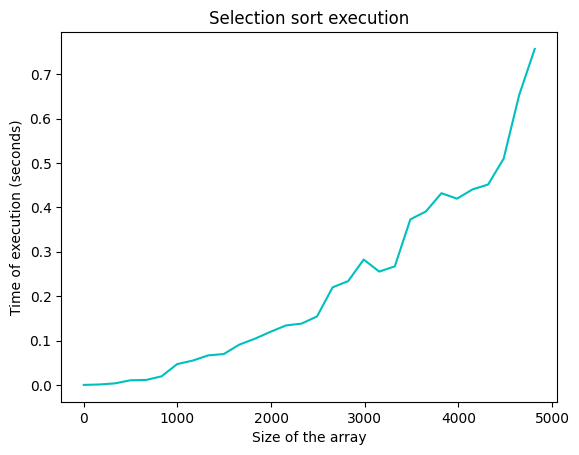

In [56]:
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_index = i
        for j in range(i + 1, n):
            if arr[min_index] > arr[j]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]
    return arr


plot_time(selection_sort)

## Merge sort:

Merge sort is a popular sorting algorithm that works by dividing a list into smaller sub-lists, sorting those sub-lists recursively, and then merging the sorted sub-lists to create a final sorted list.

The basic idea of merge sort is to:

    Divide the list into two (or more) sub-lists of roughly equal size.
    Sort each sub-list recursively by dividing it into smaller sub-lists and sorting those recursively as well.
    Merge the sorted sub-lists back together to create a final sorted list.

The advantages of merge sort are that it is highly efficient for large lists, is stable (meaning that the order of equal elements is preserved), and is well-suited to parallel processing.

The disadvantages of merge sort are that it can require more memory than other sorting algorithms, particularly for large lists, and it can be more complex to implement than simpler algorithms like insertion sort or selection sort. Additionally, it is not as efficient for small lists as some other sorting algorithms.

### Complexity:

<img src="img/merge.png" width="600"/>

### Implementation:

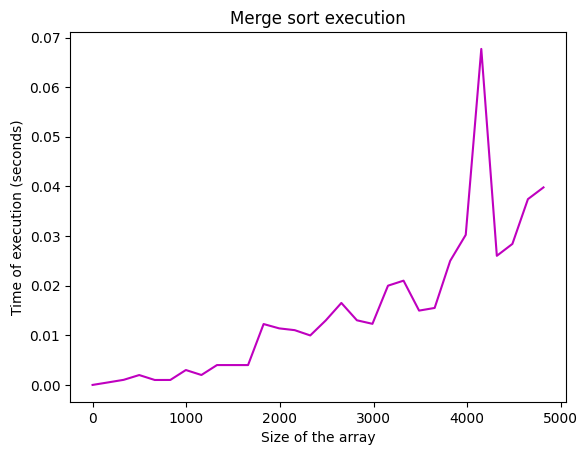

In [57]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        middle = len(arr) // 2
        left = merge_sort(arr[:middle])
        right = merge_sort(arr[middle:])
        arr = merge(left, right)
        return arr


def merge(left, right):
    result = []
    while len(left) > 0 and len(right) > 0:
        if left[0] <= right[0]:
            result.append(left[0])
            left = left[1:]
        else:
            result.append(right[0])
            right = right[1:]
    if len(left) > 0:
        result += left
    if len(right) > 0:
        result += right
    return result


plot_time(merge_sort)

## Quick sort:

Quick sort is a popular sorting algorithm that works by selecting a pivot element from the list and partitioning the other elements into two sub-lists, according to whether they are less than or greater than the pivot. The sub-lists are then sorted recursively.

The basic idea of quick sort is to:

    Select a pivot element from the list.
    Partition the other elements into two sub-lists, according to whether they are less than or greater than the pivot.
    Recursively sort each sub-list.
    Concatenate the sorted sub-lists to create a final sorted list.

There are different ways to choose the pivot element, but the most common is to select the first, last, or middle element of the list. The choice of pivot can affect the performance of the algorithm, so it is important to choose it carefully.

The advantages of quick sort are that it is highly efficient in the average case, has a relatively low memory requirement, and is well-suited to parallel processing. It is also a popular choice for sorting data stored in arrays, due to its cache-friendly nature.

The disadvantages of quick sort are that it can be less efficient than other sorting algorithms for small lists and is not stable (meaning that the order of equal elements may be changed). Additionally, the worst-case time complexity of quick sort can be a concern if the pivot is not chosen carefully.

### Complexity:

<img src="img/quick.png"/>

### Implementation:

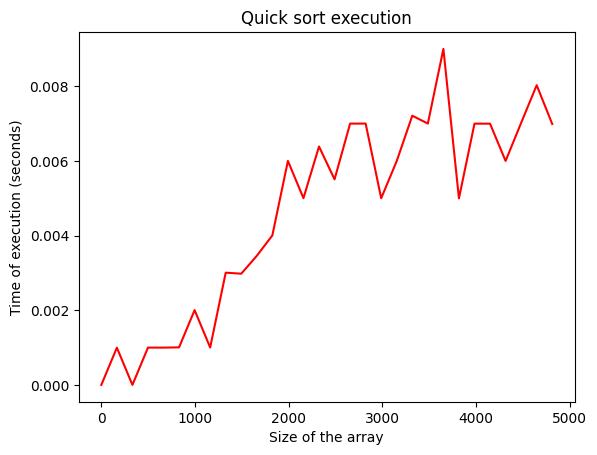

In [58]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    # We use the 'random' library for the pivot
    # to statistically reduce the worst case sorting situations
    pivot = random.choice(arr)
    lower = []
    equal = []
    greater = []
    for item in arr:
        if item < pivot:
            lower.append(item)
        elif item > pivot:
            greater.append(item)
        else:
            equal.append(item)
    return quick_sort(lower) + equal + quick_sort(greater)


plot_time(quick_sort)

## Sorting algorithms comparison:

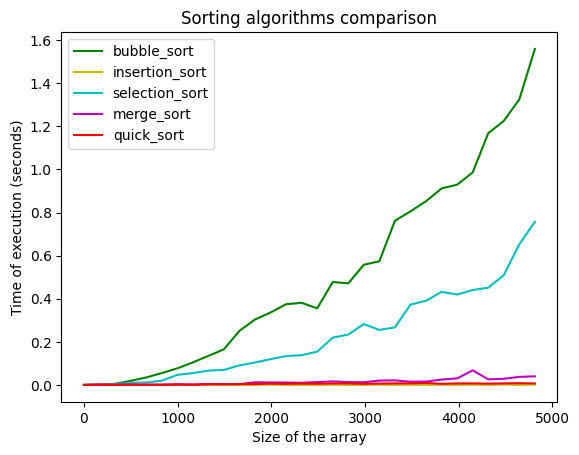

In [59]:
for algorithm in algo_dict:
    plt.plot(x_size, algo_dict[algorithm]['y_time'], algo_dict[algorithm]['color'], label=algorithm)
plt.title('Sorting algorithms comparison')
plt.xlabel('Size of the array')
plt.ylabel('Time of execution (seconds)')
plt.legend()
plt.show()

With this graph, we clearly see that bubble sort, selection sort and insertion sort are quadratic while merge sort and quick sort are quasilinear. That's coherent with what we said before for the average case of these algorithms.

## Conclusion:

As we see, time complexity is an important problem for sorting algorithms and it's important to think about it before implementing a sorting algorithm. 

Furthermore, we should also considere the memory space that the algorithm needs to sort the data. For example, merge sort needs more memory space than quick sort. And we should also considere the stability of the algorithm.

In conclusion, every sorting algorithm has its own advantages (except maybe bogosort) and disadvantages. So before implementing a sorting algorithm, it's important to know what kind of data we have to sort and what are the constraints of the problem. 